In [1]:
## Import the neccessary Libraries 
import pandas as pd 
import numpy as np
import plotly.express as px 

In [2]:
# Data Sourcing 
df = pd.read_csv(r"C:\Users\Neptune\Downloads\cars datasss.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
## To check for the missing value in a dataset 
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [4]:
df.shape

(301, 9)

In [5]:
cal = df.select_dtypes(include="object").columns 
cal

Index(['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

In [7]:
# To check for the datatype of each columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [13]:
df_yr = df[df['Year'] > 2015].reset_index()
df_yr

,index,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
1,5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
2,8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
3,10,alto 800,2017,2.85,3.60,2135,Petrol,Dealer,Manual,0
4,15,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...,...
81,289,city,2016,10.11,13.60,10980,Petrol,Dealer,Manual,0
82,292,jazz,2016,6.40,8.40,12000,Petrol,Dealer,Manual,0
83,296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
84,299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [15]:
fig = px.box(x = df_yr['Selling_Price'], color=df_yr['Year'], title= "The Selling Price by Year ")
fig.show()

In [16]:
# Drop certain columns 
df_yr.drop(columns = ['index', 'Car_Name', 'Owner'], inplace= True)
df_yr

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission
0,2017,7.25,9.85,6900,Petrol,Dealer,Manual
1,2018,9.25,9.83,2071,Diesel,Dealer,Manual
2,2016,8.75,8.89,20273,Diesel,Dealer,Manual
3,2017,2.85,3.60,2135,Petrol,Dealer,Manual
4,2016,7.75,10.79,43000,Diesel,Dealer,Manual
...,...,...,...,...,...,...,...
81,2016,10.11,13.60,10980,Petrol,Dealer,Manual
82,2016,6.40,8.40,12000,Petrol,Dealer,Manual
83,2016,9.50,11.60,33988,Diesel,Dealer,Manual
84,2017,11.50,12.50,9000,Diesel,Dealer,Manual


In [17]:
fig = px.histogram(x = df_yr['Fuel_Type'], y = df_yr['Kms_Driven'], text_auto= True, title="The Fuel type by the Kms Driven")
fig.show()

In [32]:
# Import The Subplot Libraries 
import plotly.graph_objects as go 
from plotly.subplots import make_subplots

car = df.groupby("Car_Name").agg({"Kms_Driven":"sum"}).reset_index()
df_car = car.sort_values(by = "Kms_Driven", ascending = False )

In [33]:
# To pick thecars  with the highest and lowerst distance covered.
top_car = df_car.head()
bottom_car = df_car.tail()

# The Diagram to display the highest and lowerst distance covered by Cars.
fig = make_subplots(rows = 1, cols = 2, subplot_titles=["Cars with the Highest Kms_driven", "Cars with the Lowest Kms_driven"], horizontal_spacing= 0.2)
fig.add_trace(go.Bar(x = top_car['Car_Name'], y = top_car['Kms_Driven']), row = 1, col = 1)
fig.add_trace(go.Bar(x = bottom_car['Car_Name'], y = bottom_car['Kms_Driven']), row = 1, col = 2)
fig.update_layout(showlegend = True, title = "The Cars by the Kms Driven")
fig.show()

In [34]:
df_yr

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission
0,2017,7.25,9.85,6900,Petrol,Dealer,Manual
1,2018,9.25,9.83,2071,Diesel,Dealer,Manual
2,2016,8.75,8.89,20273,Diesel,Dealer,Manual
3,2017,2.85,3.60,2135,Petrol,Dealer,Manual
4,2016,7.75,10.79,43000,Diesel,Dealer,Manual
...,...,...,...,...,...,...,...
81,2016,10.11,13.60,10980,Petrol,Dealer,Manual
82,2016,6.40,8.40,12000,Petrol,Dealer,Manual
83,2016,9.50,11.60,33988,Diesel,Dealer,Manual
84,2017,11.50,12.50,9000,Diesel,Dealer,Manual


In [54]:
# To replace the catergorical value with Integers 
df_yr['Fuel_Type']= df_yr['Fuel_Type'].replace({"Petrol":1, "Diesel":2})
df_yr['Seller_Type']= df_yr['Seller_Type'].replace({"Dealer":1, "Individual": 2})
df_yr['Transmission']=df_yr['Transmission'].replace({"Manual": 1, "Automatic":2})

C:\Users\Neptune\AppData\Local\Temp\ipykernel_17724\3676398690.py:3: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [55]:
df_yr

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission
0,2017,7.25,9.85,6900,1,1,1
1,2018,9.25,9.83,2071,2,1,1
2,2016,8.75,8.89,20273,2,1,1
3,2017,2.85,3.60,2135,1,1,1
4,2016,7.75,10.79,43000,2,1,1
...,...,...,...,...,...,...,...
81,2016,10.11,13.60,10980,1,1,1
82,2016,6.40,8.40,12000,1,1,1
83,2016,9.50,11.60,33988,2,1,1
84,2017,11.50,12.50,9000,2,1,1


In [56]:
# Data Splitting 
x = df_yr.drop("Present_Price", axis = 1)
y = df_yr['Present_Price']

In [57]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest =train_test_split(x, y, test_size= 0.2, random_state= 42)

In [62]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [63]:
xtrain

,Year,Selling_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission
54,2016,0.30,50000,1,2,1
72,2016,6.60,16002,1,1,1
11,2017,7.75,37000,1,1,2
30,2016,1.05,5700,1,2,1
40,2016,0.60,15000,1,2,1
...,...,...,...,...,...,...
20,2016,1.75,3000,1,2,1
60,2016,2.90,12500,1,1,1
71,2016,5.50,5600,1,1,1
14,2017,19.75,11000,1,1,2


In [65]:
# Model Fitting 
dtr = DecisionTreeRegressor()

dtr.fit(xtrain, ytrain)

# Model Predict after Learning the Patterns.
y_pred = dtr.predict(xtest)

# Measure the accuracy for the Model 
R2 = r2_score(ytest, y_pred)
MSE = mean_squared_error(ytest, y_pred)
MSE2 = MSE ** 0.5

print("Model Performance Evaluation")
print(f"The R2 score {R2:.2f}")
print(f"The Mean squared Error(Square Root): {MSE2:.2f}")


Model Performance Evaluation
The R2 score 0.92
The Mean squared Error(Square Root): 1.72


In [ ]:
# To Scale means to transform the values of our features in a particular range from a Mean of 0 and standard deviation of 1.
# When scaling in ML, don't scale the ytest and ytrain. We only scale the Features(Xtrain and Xtest) that affect the Target Variable.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

xtrain_sc = scaler.fit_transform(xtrain)
xtest_sc = scaler.transform(xtest)

In [67]:
# We train and test our Model again after Scaling.
dtr.fit(xtrain_sc, ytrain)

y_pred_sc = dtr.predict(xtest_sc)

R2_sc = r2_score(ytest, y_pred_sc)
MSE_sc = mean_squared_error(ytest, y_pred_sc)
MSE2_sc = MSE_sc ** 0.5

print("Model Performance Evaluation After Scaling ")
print(f"R2 score: {R2_sc:.2f}")
print(f"Mean squared Error(Square root): {MSE2_sc:.2f}")

Model Performance Evaluation After Scaling 
R2 score: 0.91
Mean squared Error(Square root): 1.80


In [74]:
# To Convert our Prediction a dataframe 
Car_prediction = pd.DataFrame({"Actual Values":ytest, "Predicted values": y_pred_sc})
Car_prediction

,Actual Values,Predicted values
75,5.80,5.71
0,9.85,6.49
70,13.60,9.40
22,1.78,1.82
12,19.77,20.91
56,7.13,6.49
10,7.87,7.90
18,25.39,23.15
4,10.79,10.79
67,7.60,5.70


In [81]:
# To display the Actual Values vs the Predicted Values in a diagram.
fig = px.scatter(x = ytest, y = y_pred_sc, title = "Actual values by the Predicted Values")
fig.show()

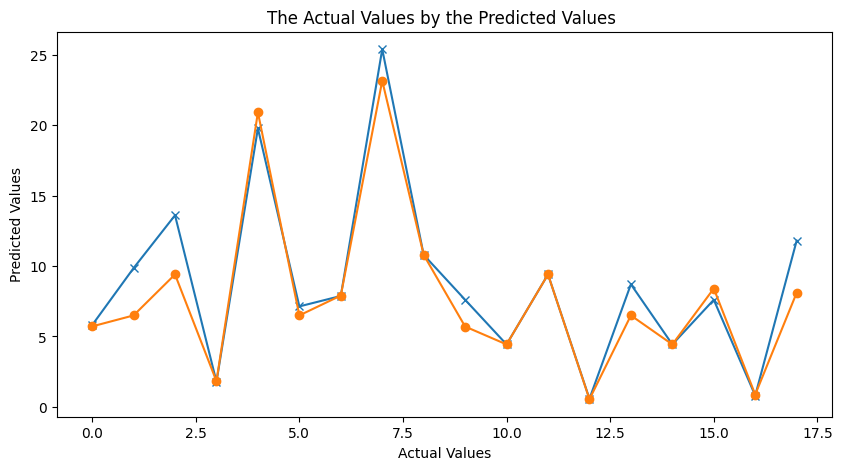

In [80]:
import matplotlib.pyplot as plt 
plt.figure(figsize= (10, 5))
plt.plot(ytest.values[: 50], label ='Actual Values', marker= "x")
plt.plot(y_pred_sc[: 50], label ='Predicted Values', marker= "o")
plt.title("The Actual Values by the Predicted Values ")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()